<a href="https://colab.research.google.com/github/merajali384022/mehraj-ali/blob/main/Random_Forest_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install opendatasets

In [2]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/ninzaami/loan-predication")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: merajali22
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/ninzaami/loan-predication


100%|██████████| 7.83k/7.83k [00:00<00:00, 20.5MB/s]

In [3]:

import pandas as pd
df = pd.read_csv("/content/loan-predication/train_u6lujuX_CVtuZ9i (1).csv")

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
df.tail()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [6]:
df.shape

(614, 13)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [10]:
dups=df.duplicated()
print('Number of duplicated rows=%d'%(dups.sum()))
df[dups]


Number of duplicated rows=0


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


In [11]:
df.shape

(614, 13)

<Axes: >

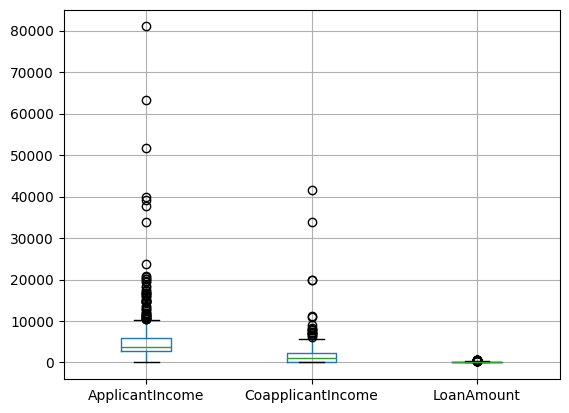

In [16]:
# Visualize the distribution of numerical columns for outlier detection
df.boxplot(column=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount'])


In [14]:
# Check for missing values
print(df.isnull().sum())

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [17]:
def remove_outliers(col):
   sorted_col = sorted(col) # It's better to work with the original Series for quantile calculation
   Q1,Q3=col.quantile([0.25,0.75])
   IQR=Q3-Q1
   lower_range=Q1-(1.5*IQR)
   upper_range=Q3+(1.5*IQR)
   return lower_range,upper_range # Return the calculated ranges

In [19]:
lrincome,urincome=remove_outliers(df['ApplicantIncome'])
print('Lower ApplicantIncome Range:',lrincome)
print('Upper ApplicantIncome Range:',urincome)

lrincome,urincome=remove_outliers(df['CoapplicantIncome'])
print('Lower CoapplicantIncome Range:',lrincome)
print('Upper CoapplicantIncome Range:',urincome)

lrincome,urincome=remove_outliers(df['LoanAmount'])
print('Lower LoanAmount Range:',lrincome)
print('Upper LoanAmount Range:',urincome)

df.shape

Lower ApplicantIncome Range: -1498.75
Upper ApplicantIncome Range: 10171.25
Lower CoapplicantIncome Range: -3445.875
Upper CoapplicantIncome Range: 5743.125
Lower LoanAmount Range: -2.0
Upper LoanAmount Range: 270.0


(614, 13)

In [20]:

df.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [22]:
# Check the data types of columns with null values
# Based on data.isnull().sum(), there are no null values in this dataset.
# If there were null values, you could use the following code:
# data[data.isnull().sum()[data.isnull().sum() > 0].index].dtypes

# Since there are no null values, we can just display the dtypes of all columns
print(df.dtypes)


Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object


In [24]:
#numerical values
median_applicant_income = df['ApplicantIncome'].median()
median_coapplicant_income = df['CoapplicantIncome'].median()
median_loan_amount = df['LoanAmount'].median()

print(f"Median Applicant Income: {median_applicant_income}")
print(f"Median Coapplicant Income: {median_coapplicant_income}")
print(f"Median Loan Amount: {median_loan_amount}")

Median Applicant Income: 3812.5
Median Coapplicant Income: 1188.5
Median Loan Amount: 128.0


array([[<Axes: title={'center': 'ApplicantIncome'}>,
        <Axes: title={'center': 'CoapplicantIncome'}>],
       [<Axes: title={'center': 'LoanAmount'}>,
        <Axes: title={'center': 'Loan_Amount_Term'}>],
       [<Axes: title={'center': 'Credit_History'}>, <Axes: >]],
      dtype=object)

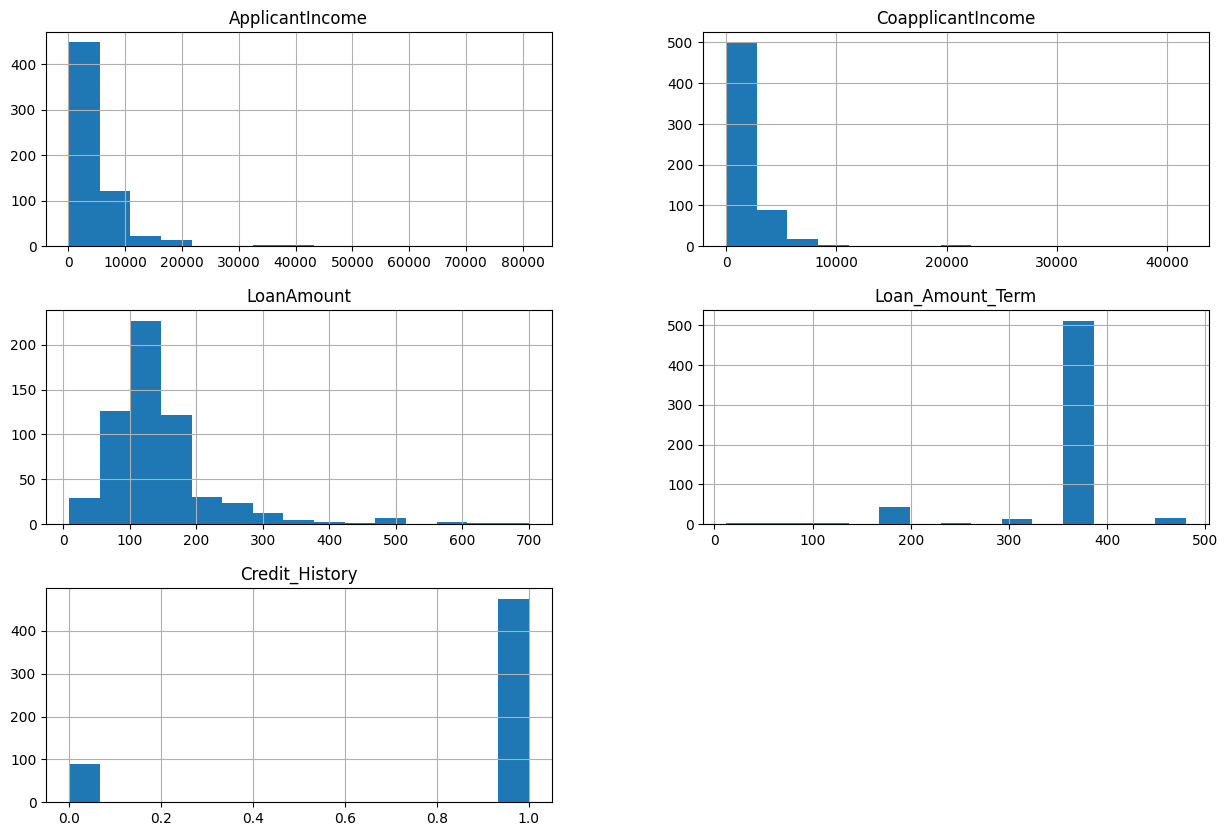

In [27]:
#plot histograms for numerical columns
import numpy as np
df.select_dtypes(include=[np.number]).hist(bins=15,figsize=(15,10))

In [29]:
#replace null in catergorical values
mode_gender = df['Gender'].mode()[0]
mode_married = df['Married'].mode()[0]
mode_dependents = df['Dependents'].mode()[0]
mode_self_employed = df['Self_Employed'].mode()[0]


# You can print the modes if you want to see them
print(f"Mode of Gender: {mode_gender}")
print(f"Mode of Married: {mode_married}")
print(f"Mode of Dependents: {mode_dependents}")
print(f"Mode of Self_Employed: {mode_self_employed}")

Mode of Gender: Male
Mode of Married: Yes
Mode of Dependents: 0
Mode of Self_Employed: No


In [32]:

df.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


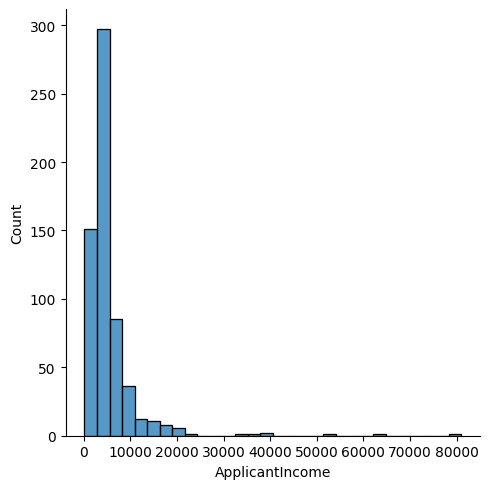

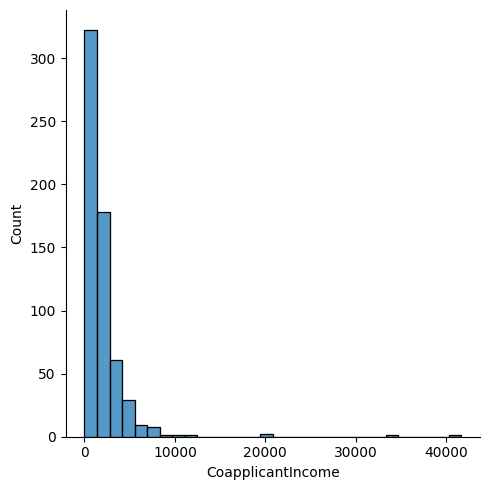

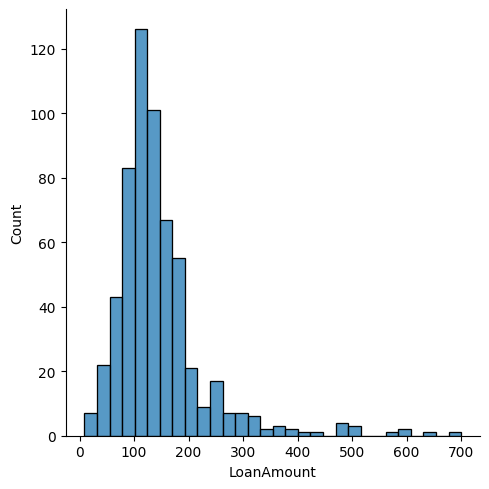

In [34]:
#UNIVARIATE ANALYSIS
import seaborn as sns
sns.displot(df['ApplicantIncome'],bins=30)
sns.displot(df['CoapplicantIncome'],bins=30)
sns.displot(df['LoanAmount'],bins=30)

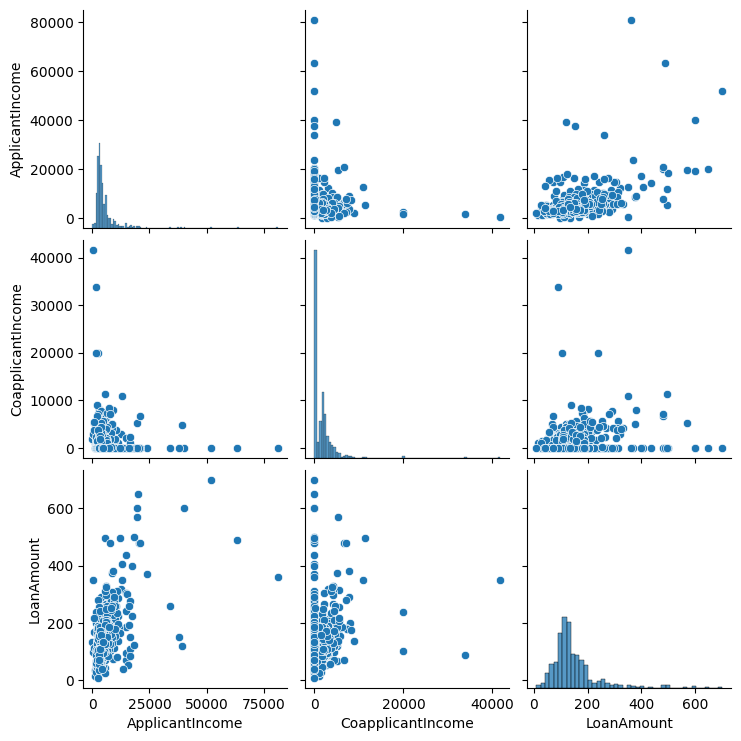

In [37]:
#BIVARIATE ANALYSIS
sns.pairplot(df[['ApplicantIncome','CoapplicantIncome','LoanAmount']])


In [39]:
# Calculate correlation only on numerical columns
numerical_data = df.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numerical_data.corr()
print(correlation_matrix)

                   ApplicantIncome  CoapplicantIncome  LoanAmount  \
ApplicantIncome           1.000000          -0.116605    0.570909   
CoapplicantIncome        -0.116605           1.000000    0.188619   
LoanAmount                0.570909           0.188619    1.000000   
Loan_Amount_Term         -0.045306          -0.059878    0.039447   
Credit_History           -0.014715          -0.002056   -0.008433   

                   Loan_Amount_Term  Credit_History  
ApplicantIncome           -0.045306       -0.014715  
CoapplicantIncome         -0.059878       -0.002056  
LoanAmount                 0.039447       -0.008433  
Loan_Amount_Term           1.000000        0.001470  
Credit_History             0.001470        1.000000  


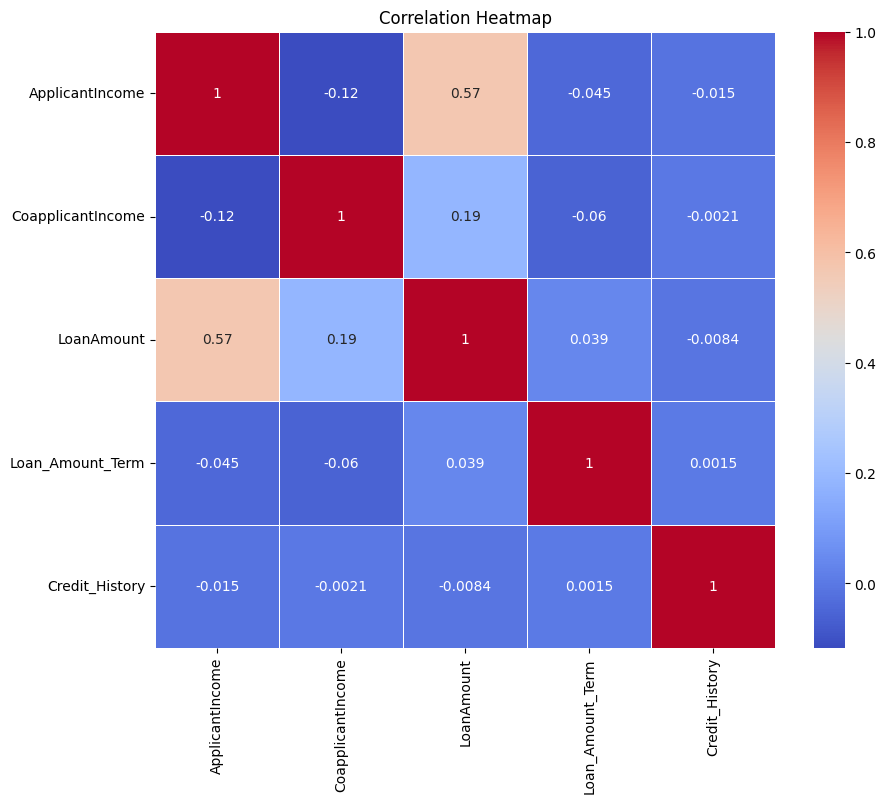

In [41]:
#correlation heatmap
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [43]:
#normalizing and scaling
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
data_scaled= pd.DataFrame(scaler.fit_transform(df.select_dtypes(include=[np.number])),
                     columns=df.select_dtypes(include=[np.number]).columns)
display(data_scaled.head())

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0.070489,0.000000,NaN,0.74359,1.0
1,0.054830,0.036192,0.172214,0.74359,1.0
2,0.035250,0.000000,0.082489,0.74359,1.0
3,0.030093,0.056592,0.160637,0.74359,1.0
4,0.072356,0.000000,0.191027,0.74359,1.0


from matplotlib import pyplot as plt
_df_0['ApplicantIncome'].plot(kind='hist', bins=20, title='ApplicantIncome')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['CoapplicantIncome'].plot(kind='hist', bins=20, title='CoapplicantIncome')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['LoanAmount'].plot(kind='hist', bins=20, title='LoanAmount')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='ApplicantIncome', y='CoapplicantIncome', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='CoapplicantIncome', y='LoanAmount', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Loan_Amount_Term']
  ys = series['ApplicantIncome']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('Loan_Amount_Term', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Loan_Amount_Term')
_ = plt.ylabel('ApplicantIncome')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Loan_Amount_Term']
  ys = series['CoapplicantIncome']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('Loan_Amount_Term', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Loan_Amount_Term')
_ = plt.ylabel('CoapplicantIncome')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Loan_Amount_Term']
  ys = series['LoanAmount']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('Loan_Amount_Term', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Loan_Amount_Term')
_ = plt.ylabel('LoanAmount')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Loan_Amount_Term']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Loan_Amount_Term'}, axis=1)
              .sort_values('Loan_Amount_Term', ascending=True))
  xs = counted['Loan_Amount_Term']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('Loan_Amount_Term', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Loan_Amount_Term')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_9['ApplicantIncome'].plot(kind='line', figsize=(8, 4), title='ApplicantIncome')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['CoapplicantIncome'].plot(kind='line', figsize=(8, 4), title='CoapplicantIncome')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['LoanAmount'].plot(kind='line', figsize=(8, 4), title='LoanAmount')
plt.gca().spines[['top', 'right']].set_visible(False)

In [46]:
#scales the data.Essentially returns the z-scores of every attribute
from sklearn.preprocessing import StandardScaler
std_scaler=StandardScaler()
data_scaled

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0.070489,0.000000,NaN,0.743590,1.0
1,0.054830,0.036192,0.172214,0.743590,1.0
2,0.035250,0.000000,0.082489,0.743590,1.0
3,0.030093,0.056592,0.160637,0.743590,1.0
4,0.072356,0.000000,0.191027,0.743590,1.0
...,...,...,...,...,...
609,0.034014,0.000000,0.089725,0.743590,1.0
610,0.048930,0.000000,0.044863,0.358974,1.0
611,0.097984,0.005760,0.353111,0.743590,1.0
612,0.091936,0.000000,0.257598,0.743590,1.0


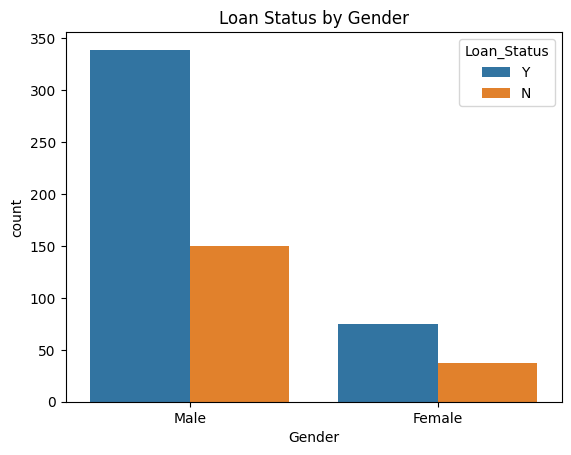

In [45]:
# Create bar plots to visualize the relationship between categorical features and Loan_Status
sns.countplot(data=df, x='Gender', hue='Loan_Status')
plt.title('Loan Status by Gender')
plt.show()

In [47]:
# load dataset
from sklearn.datasets import load_breast_cancer
X, y = load_breast_cancer(return_X_y=True)

# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=2529)

# select model
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

# train model
rfc.fit(X_train, y_train)

# predict
y_pred = rfc.predict(X_test)

# accuracy
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0], (y_test != y_pred).sum()))


              precision    recall  f1-score   support

           0       0.95      0.89      0.92        64
           1       0.94      0.97      0.95       107

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.94       171
weighted avg       0.94      0.94      0.94       171

Number of mislabeled points out of a total 171 points : 10


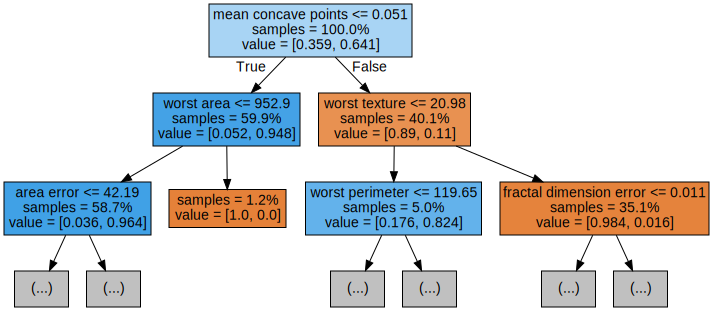

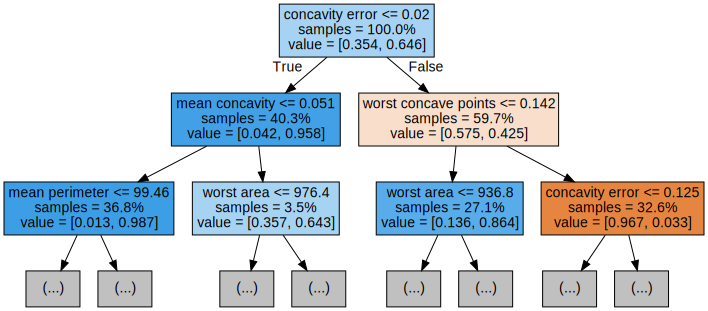

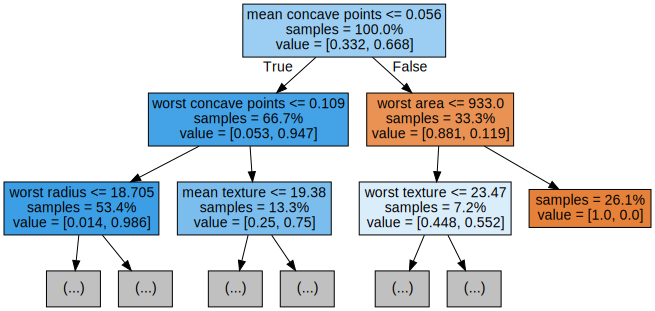

In [48]:
# Export the first three decision trees from the forest

from sklearn.tree import export_graphviz
import graphviz
for i in range(3):
    tree = rfc.estimators_[i]
    dot_data =  export_graphviz(tree,
                               feature_names=load_breast_cancer().feature_names,
                               #feature_names=X_train.columns
                               filled=True,
                               max_depth=2,
                               impurity=False,
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)


/tmp/ipython-input-1840841123.py:13: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


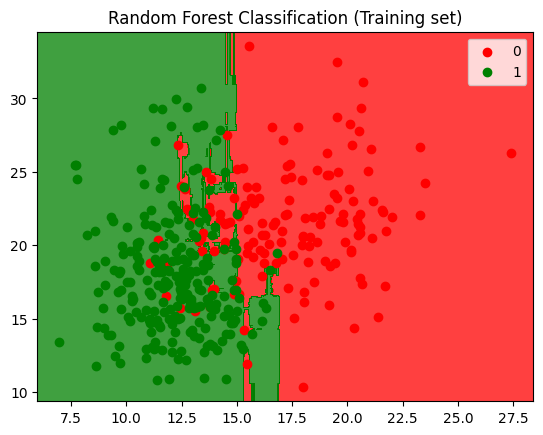

In [49]:
# Visualizing the train results

from matplotlib.colors import ListedColormap
X_set, y_set = X_train[:,0:2], y_train
rfc.fit(X_set,y_set)
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, rfc.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Random Forest Classification (Training set)')
#plt.xlabel(X_train.columns[0])
#plt.ylabel(y_set.columns)
plt.legend()
plt.show()


In [52]:
# hyperparameter tuning

from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators': [100,200,300,400,500],
              'max_depth': range(1,10),
              'criterion':['gini','entropy']}
grid = GridSearchCV(estimator = rfc,
                           param_grid = parameters,
                           scoring = 'recall',
                           cv = 5)

In [53]:
grid.fit(X_train,y_train)

print(grid.best_score_)
print(grid.best_params_)

0.9800000000000001
{'criterion': 'gini', 'max_depth': 7, 'n_estimators': 200}


In [55]:
y_pred = grid.predict(X_test)

In [56]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.88      0.91        64
           1       0.93      0.97      0.95       107

    accuracy                           0.94       171
   macro avg       0.94      0.92      0.93       171
weighted avg       0.94      0.94      0.94       171



In [58]:
#save the cleaned dataset to a new csv file
df.to_csv('cleaned_loan_predication_data.csv',index=False)